In [9]:
import numpy as np
from pyscf import gto
from qclab.drivers.serial_driver import dynamics_serial
from qclab.models.ab_initio import AbInitioModel
from qclab.recipes import AbInitioMeanFieldDynamicsRecipe
# Define the molecule.
mol = gto.M(atom="H 0 0 0; H 0 0 2", basis="6-31g")
# Define an initial momentum for each atom.
init_momentum = np.array([[0, 0, 0], [0, 0, -.01]])
# Initialize the ab initio model providing the mol object, initial momentum, 
# number of electronic states, and electronic structure theory method. 
inputs = {"pyscf_mol":mol, "init_momentum":init_momentum, "num_states":5, "method":"CISD"}
model = AbInitioModel(inputs)
# Define an initial wavefunction in the adiabatic basis.
model.wf_adb = np.zeros(model.num_states) + 0.0j
model.wf_adb[0] = 1.0 + 0.0j
# Initialize the dynamics algorithm and set the simulation parameters.
recipe = AbInitioMeanFieldDynamicsRecipe()
recipe.params.tmax = 15
recipe.params.dt_output = .1
recipe.params.dt = .01
# Execute the simulation using the dynamics driver.
data = dynamics_serial(recipe=recipe, model=model)


[1. 1. 1. 1. 1. 1.]
[[0. 0. 0.]
 [0. 0. 2.]]


  0%|          | 0/1 [00:00<?, ?it/s]

0.0 1.0
0.006662225183211193 1.0000000032711
0.013324450366422385 1.0000000065439443
0.019986675549633577 1.0000000098195083
0.02664890073284477 1.000000013098863
0.033311125916055964 1.0000000163826719
0.039973351099267154 1.0000000196722534
0.046635576282478344 1.0000000229683907
0.05329780146568954 1.0000000262719353
0.05996002664890073 1.000000029584821
0.06662225183211193 1.0000000329075658
0.07328447701532312 1.0000000362415926
0.07994670219853431 1.0000000395863065
0.0866089273817455 1.000000042949019
0.09327115256495669 1.0000000463247891
0.09993337774816789 1.0000000497166688
0.10659560293137908 1.0000000531292332
0.11325782811459027 1.000000056564941
0.11992005329780146 1.0000000600286467
0.12658227848101267 1.000000063514727
0.13324450366422386 1.0000000670287756
0.13990672884743505 1.0000000705740408
0.14656895403064624 1.0000000741534907
0.15323117921385743 1.0000000777798277
0.15989340439706862 1.0000000814523182
0.1665556295802798 1.0000000851600825
0.173217854763491 1.0

100%|██████████| 1/1 [05:44<00:00, 344.20s/it]

0.9993337774816788 1.0000005004752994


In [5]:
import matplotlib.pyplot as plt
q_data_nad = data.data_dic['q_coord']
wf_adb_nad = data.data_dic['wf_adb']
t_nad = data.data_dic['t']
diag_eq_nad = data.data_dic['diag_eq']
e_c = data.data_dic['e_c']
e_q = data.data_dic['e_q']
print(e_q[0])
print(e_c[0])
print(2/19)

-1.2788988801733523
5.0000000000050004e-05
0.10526315789473684


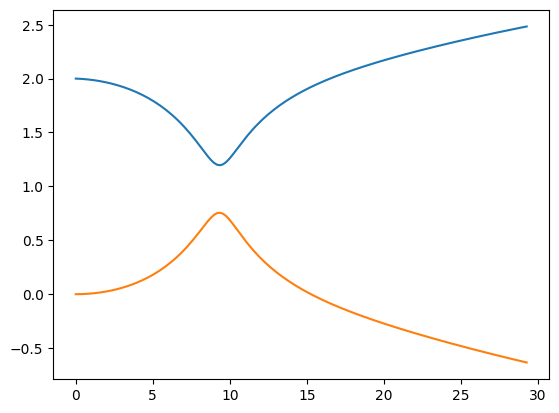

29.274150000000002


In [11]:
plt.plot(t_nad,np.real(q_data_nad[:,1,2]))
plt.plot(t_nad,np.real(q_data_nad[:,0,2]))
#plt.xlim([0,1])
#plt.ylim([-1,1])
plt.show()
print(t_nad[-1])

In [14]:
#data.save_as_h5('p1_data.h5')

In [21]:
import qclab.auxiliary as auxiliary

data = auxiliary.Data()
data.load_from_h5('p1_data.h5')

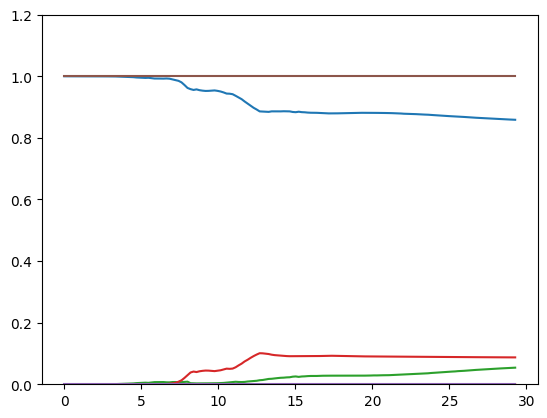

/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


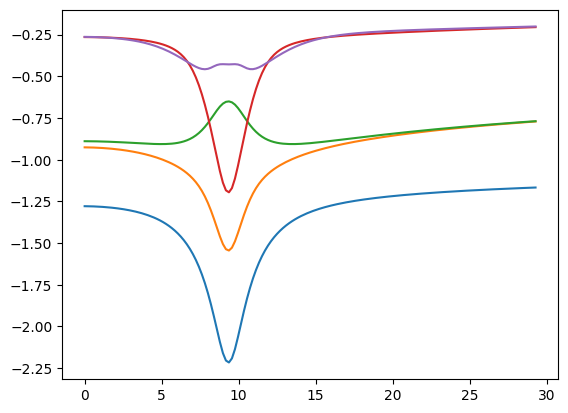

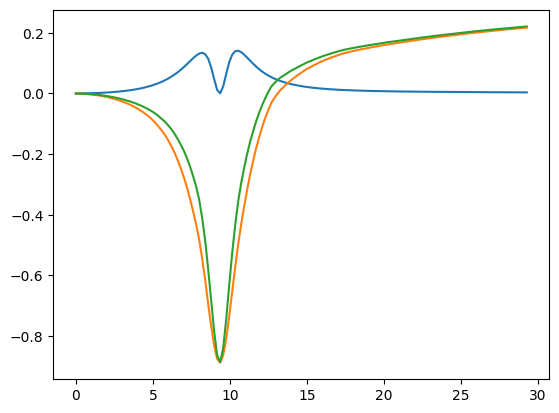

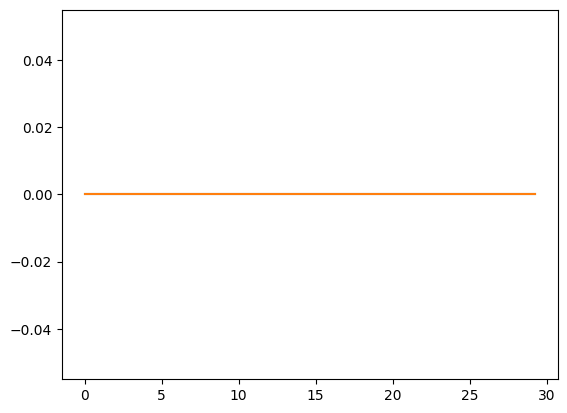

In [10]:
import matplotlib.pyplot as plt
q_data_nad = data.data_dic['q_coord']
wf_adb_nad = data.data_dic['wf_adb']
t_nad = data.data_dic['t']*1.95161
diag_eq_nad = data.data_dic['diag_eq']
e_c = data.data_dic['e_c']
e_q = data.data_dic['e_q']

plt.plot(t_nad,np.abs(np.sum(wf_adb_nad,axis=(1,2)))**2)
plt.plot(t_nad,np.sum(np.abs(wf_adb_nad)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
plt.plot(t_nad, diag_eq_nad)
plt.show()
plt.plot(t_nad, e_c-e_c[0])
plt.plot(t_nad, (e_q-e_q[0]))
plt.plot(t_nad, (e_q-e_q[0]) + e_c-e_c[0])
plt.show()


q_data_nad=np.real(q_data_nad.reshape((len(q_data_nad), model.num_atoms, 3)))
#plt.plot(t_nad,np.real(q_data_nad[:,:,2]))
plt.plot(t_nad,np.real(q_data_nad[:,:,0]))
#plt.plot(t_nad,np.real(q_data_nad[:,:,1]))
#plt.xlim([0,1])
#plt.ylim([-1,1])
plt.show()

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from os.path import expanduser
import scipy
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from numpy import genfromtxt
import matplotlib.colors as colors
import dill as pickle
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
fontpath = expanduser('/home/akrotz/Documents/fonts/truetype/msttcorefonts/Times_New_Roman.ttf')
prop = font_manager.FontProperties(fname=fontpath)
print(prop.get_name())
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.rm']=prop.get_name()
nice_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif" : "Times New Roman",
    "font.weight"  : "bold",
}

mpl.rcParams.update(nice_fonts)

Times New Roman


0.0


/tmp/ipykernel_70340/4256354847.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('H2_collision.pdf',dpi=600)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


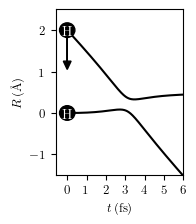

In [78]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=False,figsize=(1.8,2.1), dpi=100)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig, left=0.26, bottom=0.2, right=0.97, top=0.99, wspace=0.1, hspace=0.4)
ax0 = fig.add_subplot(spec[0])


ax0.plot(t_nad,np.real(q_data_nad[:,0,-1]), color='black')
ax0.plot(t_nad,np.real(q_data_nad[:,1,-1]), color='black')
ax0.set_xlim([-0.6,6])
ax0.set_xticks([0,1,2,3,4,5,6])
ax0.set_xticklabels([r'$0$',r'$1$',r'$2$',r'$3$',r'$4$',r'$5$',r'$6$'], fontsize=9)
ax0.set_yticks([-2,-1,0,1,2])
ax0.set_yticklabels([r'$-2$',r'$-1$',r'$0$',r'$1$',r'$2$'], fontsize=9)
ax0.set_ylim([-1.5,2.5])
ax0.set_ylabel(r'$R\,(\mathrm{\AA})$', fontsize=9)
ax0.set_xlabel(r'$t\,(\mathrm{fs})$',fontsize=9)
t_ind_1 = 0
print(t_nad[t_ind_1])
circle1a = plt.Circle((t_nad[t_ind_1], q_data_nad[t_ind_1,0,-1]), 0.2, color='black')
circle1b = plt.Circle((t_nad[t_ind_1], q_data_nad[t_ind_1,1,-1]+.27), 0.2, color='black')
ax0.add_patch(circle1a)
# Create a scaling transformation
scale_x = 2.2*.9  # Keep x-scale unchanged
scale_y = 2.2*.4  # Stretch the circle vertically by a factor of 2
import matplotlib.transforms as transforms
transform = transforms.Affine2D().scale(scale_x, scale_y) + ax0.transData
#circle1b.set_transform(transform)
circle1a.set_transform(transform)
ax0.add_patch(circle1b)
transform = transforms.Affine2D().scale(scale_x, scale_y) + ax0.transData
#circle1b.set_transform(transform)
circle1b.set_transform(transform)
#ax0.set_aspect('equal')
ax0.arrow(t_nad[t_ind_1], q_data_nad[t_ind_1,1,-1],0,-0.75, head_width=0.4,head_length=0.2, color='black')
ax0.text(t_nad[t_ind_1]-0.27, q_data_nad[t_ind_1,1,-1]-0.12,r'$\mathrm{H}$', color='white', fontsize=10)
ax0.text(t_nad[t_ind_1]-0.27, q_data_nad[t_ind_1,0,-1]-0.12,r'$\mathrm{H}$', color='white', fontsize=10)

plt.savefig('H2_collision.pdf',dpi=600)
plt.show()

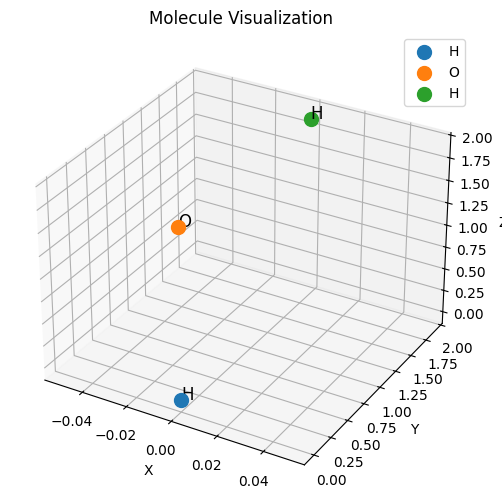

In [8]:
from pyscf import gto
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_molecule(mol, figsize=(8, 6)):
    """
    Visualizes a PySCF molecule object in 3D.

    Args:
        mol: A PySCF `mol` object.
        figsize: Tuple specifying the figure size (width, height).
    """

    coords = mol.atom_coords()
    atom_symbols = [n[0] for n in mol._atom]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atom_symbols):
        ax.scatter(coords[i, 0], coords[i, 1], coords[i, 2], s=100, label=atom)
        ax.text(coords[i, 0], coords[i, 1], coords[i, 2], atom, fontsize=12)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title('Molecule Visualization')
    plt.show()

# Example usage:
mol = gto.M(atom='H 0 0 0; O 0 0 1; H 0 1 1')  # Water molecule
visualize_molecule(mol)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qclab.models.ab_initio import AbInitioModel
from qclab.drivers.serial_driver import dynamics_serial
from qclab.recipes import AbInitioMeanFieldDynamicsRecipe
from pyscf import gto
# Define the molecule
mol = gto.M(
    atom="""H 0 0 0; 
    H 0 0 2""",
    basis="sto-3g"
)

init_momentum = np.array([[0,0,0],[0,0,-3]])#np.zeros_like(np.array(mol.atom_coords()))

input_params = dict(pyscf_mol = mol, init_momentum=init_momentum, num_states=2, method='UCISD')
model = AbInitioModel(input_params)

model.wf_adb = np.zeros(model.num_states)+0.0j
model.wf_adb[0] = 1.0+0.0j

recipe = AbInitioMeanFieldDynamicsRecipe()



recipe.params.num_trajs = 1
recipe.params.batch_size = 1
recipe.params.tmax = 1
recipe.params.dt_output = 0.1
recipe.params.dt = 0.01


def energies_forces(state, model, params):
    state.e_c_k = np.real(np.sum((model.pq_weight[...,:]/4)*(2*np.conj(state.z_coord)*state.z_coord - 
                                                             state.z_coord*state.z_coord - np.conj(state.z_coord)*np.conj(state.z_coord))))

    out = np.zeros((params.batch_size, params.num_branches))
    for traj in range(params.batch_size):
        for branch in range(params.num_branches):
            mf = state.ab_initio_hams_mf[traj][branch]
            out[traj, branch] += mf.mol.energy_nuc() # obtian nuclear potential energy
    state.e_c_q = np.sum(out, axis=(0,1))
    return state, model, params

recipe.output.append(energies_forces)
recipe.output_names.append('e_c_k')
recipe.output_names.append('e_c_q')

data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)

[1. 1. 1. 1. 1. 1.]
[[0. 0. 0.]
 [0. 0. 2.]]


  0%|          | 0/1 [00:00<?, ?it/s]

0.0 1.0
0.09900990099009901 1.0000000019073285
0.19801980198019803 1.0000000034924326
0.297029702970297 1.0000000046282236
0.39603960396039606 1.0000000052378488
0.49504950495049505 1.000000005390992
0.594059405940594 1.0000000054322968
0.693069306930693 1.0000000056378906
0.7920792079207921 1.0000000056853495
0.8910891089108911 1.0000000058814176


100%|██████████| 1/1 [00:07<00:00,  7.40s/it]

0.9900990099009901 1.0000000066176598


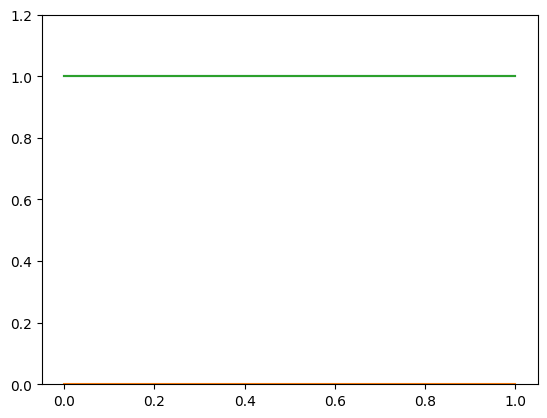

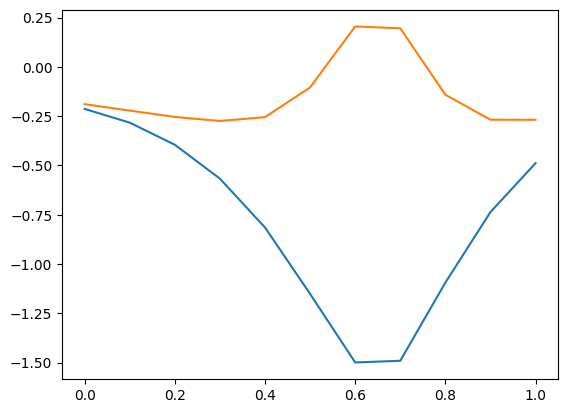

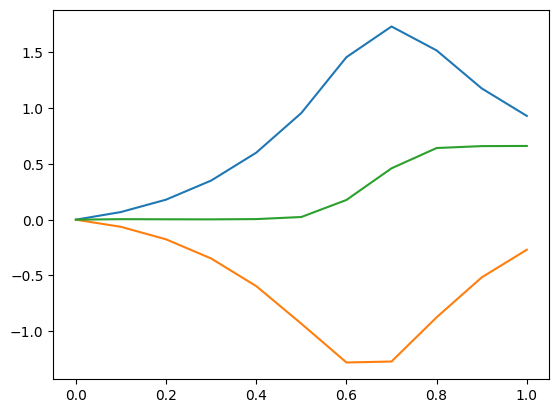

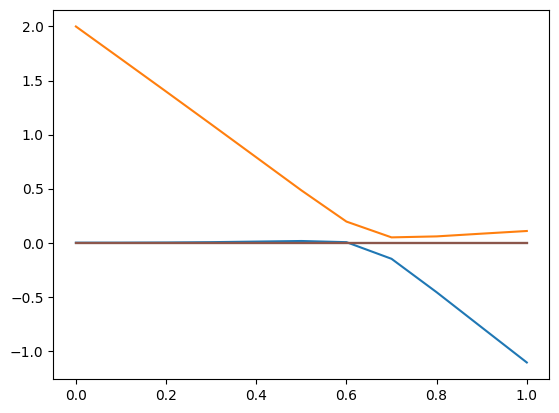

In [6]:

q_data_nad = data.data_dic['q_coord']
wf_adb_nad = data.data_dic['wf_adb']
t_nad = data.data_dic['t']
diag_eq_nad = data.data_dic['diag_eq']
e_c = data.data_dic['e_c']
e_q = data.data_dic['e_q']
e_c_k = data.data_dic['e_c_k']
e_c_q = data.data_dic['e_c_q']


plt.plot(t_nad,np.abs(np.sum(wf_adb_nad,axis=(1,2)))**2)
plt.plot(t_nad,np.sum(np.abs(wf_adb_nad)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
plt.plot(t_nad, diag_eq_nad)
plt.show()
plt.plot(t_nad, e_c-e_c[0])
plt.plot(t_nad, (e_q-e_q[0]))
plt.plot(t_nad, (e_q-e_q[0]) + e_c-e_c[0])
plt.show()


q_data_nad=q_data_nad.reshape((len(q_data_nad), model.num_atoms, 3))
plt.plot(t_nad,np.real(q_data_nad[:,:,2]))
plt.plot(t_nad,np.real(q_data_nad[:,:,0]))
plt.plot(t_nad,np.real(q_data_nad[:,:,1]))
#plt.xlim([0,1])
#plt.ylim([-1,1])
plt.show()

In [9]:
import pyscf
from pyscf import gto, scf, ci, lib
with lib.with_omp_threads(10):

    # Define the molecule
    mol = gto.M(
        atom="H 0 0 0; F 0 0 1.1",
        basis="6-31g",
        spin=0,  # 0 for singlet, 2 for triplet
    )

    print(mol.atom_coords())

    # Create two different UCISD wavefunctions
    # 1. At equilibrium geometry
    mf1 = scf.UHF(mol).run()
    myci1 = ci.UCISD(mf1).run()

    # 2. At stretched geometry
    mol2 = gto.M(
        atom="H 0 0 0; F 0 0 2.1",
        basis="6-31g",
        spin=0,
    )
    mf2 = scf.UHF(mol2).run()
    myci2 = ci.UCISD(mf2).run()

    # Calculate the overlap
    s12a = mf1.mo_coeff[0].T @ mol.intor("int1e_ovlp") @ mf2.mo_coeff[0]
    s12b = mf1.mo_coeff[1].T @ mol.intor("int1e_ovlp") @ mf2.mo_coeff[1]
    s12 = (s12a, s12b)
    #ovlp = myci1.get_ovlp(myci2, s12)
    nocc = (mf1.mol.nelectron//2, mf1.mol.nelectron//2)
    print(nocc)
    nmo = (mf1.mo_energy.size//2, mf1.mo_energy.size//2)
    print(nmo)
    ovlp = pyscf.ci.ucisd.overlap(myci1.ci, myci2.ci, nocc=nocc, nmo=nmo, s=s12)

    print("Overlap between the two UCISD wavefunctions:", ovlp)

[[0.         0.         0.        ]
 [0.         0.         2.07869874]]
converged SCF energy = -99.9593211672822  <S^2> = 2.6592062e-12  2S+1 = 1
E(UCISD) = -100.0954565440086  E_corr = -0.136135376726409
converged SCF energy = -99.7271674315174  <S^2> = 1.9246826e-12  2S+1 = 1
E(UCISD) = -99.93419241784079  E_corr = -0.207024986323425
(5, 5)
(11, 11)
Overlap between the two UCISD wavefunctions: -1.0189033248131503


/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


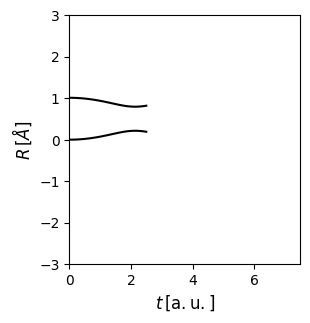

In [8]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=False,figsize=(3,3), dpi=100)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig, left=0.2, bottom=0.15, right=0.97, top=0.98, wspace=0.1, hspace=0.4)
ax0 = fig.add_subplot(spec[0])


ax0.plot(t_nad,np.real(q_data_nad[:,0,-1]), color='black')
ax0.plot(t_nad,np.real(q_data_nad[:,1,-1]), color='black')
ax0.set_xlim([0,7.5])
ax0.set_ylim([-3,3])
ax0.set_ylabel(r'$R\,[\AA]$', fontsize=12)
ax0.set_xlabel(r'$t\,[\mathrm{a.u.}]$',fontsize=12)
#plt.savefig('H2_collision.pdf',dpi=600)
plt.show()

In [4]:
from pyscf import gto
import numpy as np
bohr_to_angstrom = 0.529177249
mol = gto.M(atom='H 0 0 0; H 0 0 1')  # Example molecule
# Get the current coordinates
atoms = [n[0] for n in mol._atom]
coords = [list(np.asarray(n[1])*bohr_to_angstrom) for n in mol._atom]
new_atom = [(atoms[n], list(coords[n])) for n in range(len(atoms))]
print(new_atom)
print(coords)
print(atoms)

mol = gto.M(atom=new_atom)
atoms = [n[0] for n in mol._atom]
coords = [list(np.asarray(n[1])*bohr_to_angstrom) for n in mol._atom]
new_atom = [(atoms[n], list(coords[n])) for n in range(len(atoms))]
print(new_atom)
print(coords)
print(atoms)
print(mol.basis)


[('H', [np.float64(0.0), np.float64(0.0), np.float64(0.0)]), ('H', [np.float64(0.0), np.float64(0.0), np.float64(1.0000000719607707)])]
[[np.float64(0.0), np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0), np.float64(1.0000000719607707)]]
['H', 'H']
[('H', [np.float64(0.0), np.float64(0.0), np.float64(0.0)]), ('H', [np.float64(0.0), np.float64(0.0), np.float64(1.0000001439215465)])]
[[np.float64(0.0), np.float64(0.0), np.float64(0.0)], [np.float64(0.0), np.float64(0.0), np.float64(1.0000001439215465)]]
['H', 'H']
sto-3g


In [5]:
mol = gto.M(
    atom='''
        C     0.000000    1.392669    0.000000
        C     1.208553    0.696335    0.000000
        C     1.208553   -0.696335    0.000000
        C     0.000000   -1.392669    0.000000
        C    -1.208553   -0.696335    0.000000
        C    -1.208553    0.696335    0.000000
        H     0.000000    2.481383    0.000000
        H     2.151886    1.240691    0.000000
        H     2.151886   -1.240691    0.000000
        H     0.000000   -2.481383    0.000000
        H    -2.151886   -1.240691    0.000000
        H    -2.151886    1.240691    0.000000
    ''',
    basis='sto-3g' 
)


init_momentum = np.zeros_like(np.array(mol.atom_coords()))

input_params = dict(pyscf_mol = mol, init_momentum=init_momentum, basis='6-31g', num_states=3, method='CISD')
model = AbInitioModel(input_params)

model.wf_adb = np.zeros(model.num_states)+0.0j
model.wf_adb[0] = 1.0+0.0j

recipe = AbInitioMeanFieldDynamicsRecipe()



recipe.params.num_trajs = 1
recipe.params.batch_size = 1
recipe.params.tmax = 30
recipe.params.dt_output = 0.1
recipe.params.dt = 0.01


def energies_forces(state, model, params):
    state.e_c_k = np.real(np.sum((model.pq_weight[...,:]/4)*(2*np.conj(state.z_coord)*state.z_coord - 
                                                             state.z_coord*state.z_coord - np.conj(state.z_coord)*np.conj(state.z_coord)),axis=(0,1)))

    out = np.zeros((params.batch_size, params.num_branches))
    for traj in range(params.batch_size):
        for branch in range(params.num_branches):
            mf = state.ab_initio_hams_mf[traj][branch]
            out[traj, branch] += mf.mol.energy_nuc() # obtian nuclear potential energy
    state.e_c_q = np.sum(out, axis=(0,1))
    return state, model, params

recipe.output.append(energies_forces)
recipe.output_names.append('e_c_k')
recipe.output_names.append('e_c_q')

data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)

[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


  0%|          | 0/1 [00:00<?, ?it/s]

0.0 1.0


  0%|          | 0/1 [01:30<?, ?it/s]


KeyboardInterrupt: 

/tmp/ipykernel_1750666/1323007268.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('H2_collision.pdf',dpi=600)
/tmp/ipykernel_1750666/1323007268.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('H2_collision.pdf',dpi=600)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


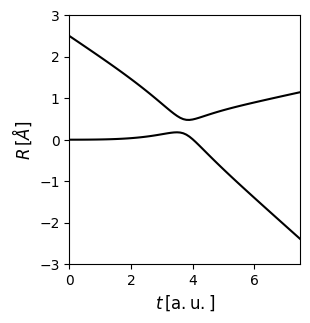

In [36]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=False,figsize=(3,3), dpi=100)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig, left=0.2, bottom=0.15, right=0.97, top=0.98, wspace=0.1, hspace=0.4)
ax0 = fig.add_subplot(spec[0])


ax0.plot(t_nad,np.real(q_data_nad[:,0,-1]), color='black')
ax0.plot(t_nad,np.real(q_data_nad[:,1,-1]), color='black')
ax0.set_xlim([0,7.5])
ax0.set_ylim([-3,3])
ax0.set_ylabel(r'$R\,[\AA]$', fontsize=12)
ax0.set_xlabel(r'$t\,[\mathrm{a.u.}]$',fontsize=12)
plt.savefig('H2_collision.pdf',dpi=600)
plt.show()

In [3]:
import pyscf
from pyscf import gto, scf, ci

# Define the molecule
mol = gto.M(
    atom="H 0 0 0; F 0 0 1.1",
    basis="6-31g",
    spin=0,  # 0 for singlet, 2 for triplet
)

print(mol.atom_coords())

# Create two different UCISD wavefunctions
# 1. At equilibrium geometry
mf1 = scf.UHF(mol).run()
myci1 = ci.UCISD(mf1).run()

# 2. At stretched geometry
mol2 = gto.M(
    atom="H 0 0 0; F 0 0 2.1",
    basis="6-31g",
    spin=0,
)
mf2 = scf.UHF(mol2).run()
myci2 = ci.UCISD(mf2).run()

# Calculate the overlap
s12a = mf1.mo_coeff[0].T @ mol.intor("int1e_ovlp") @ mf2.mo_coeff[0]
s12b = mf1.mo_coeff[1].T @ mol.intor("int1e_ovlp") @ mf2.mo_coeff[1]
s12 = (s12a, s12b)
#ovlp = myci1.get_ovlp(myci2, s12)
nocc = (mf1.mol.nelectron//2, mf1.mol.nelectron//2)
print(nocc)
nmo = (mf1.mo_energy.size//2, mf1.mo_energy.size//2)
print(nmo)
ovlp = pyscf.ci.ucisd.overlap(myci1.ci, myci2.ci, nocc=nocc, nmo=nmo, s=s12)

print("Overlap between the two UCISD wavefunctions:", ovlp)

[[0.         0.         0.        ]
 [0.         0.         2.07869874]]
converged SCF energy = -99.9593211672823  <S^2> = 2.6592062e-12  2S+1 = 1
E(UCISD) = -100.0954565440082  E_corr = -0.1361353767259743
converged SCF energy = -99.7271674315174  <S^2> = 1.9202417e-12  2S+1 = 1
E(UCISD) = -99.93419241780811  E_corr = -0.2070249862906854
(5, 5)
(11, 11)
Overlap between the two UCISD wavefunctions: 1.0189037507361887


In [7]:
import pyscf 
from pyscf import gto, scf, ci, grad, nac, fci
import numpy as np
from functools import reduce
from tqdm import tqdm
# Define the molecule
nuc_pos = np.arange(0.5, 5,0.01)
e_tot = np.zeros((len(nuc_pos), 2))
e_nuc = np.zeros((len(nuc_pos)))
e_nuc_grad = np.zeros((len(nuc_pos)))
ind = 0
for pos in tqdm(nuc_pos):
    mol = gto.M(
        atom="""
        H 0.0 0.0 0.0
        H 0.0 0.0 """ + str(pos),
        basis='6-31g',
        #ecp='crenbl'
    )
    mol.verbose=0

    # Perform a Hartree-Fock calculation
    mf = scf.RHF(mol).run()#.x2c().run()



    # Calculate the CI wavefunction for the first two excited states
    myci = ci.CISD(mf)
    myci.complex_coeff = True
    myci.nroots = 2
    myci.run()
    myci.kernel()


    e_tot[ind] = myci.e_tot #- mf.energy_nuc()
    e_nuc[ind] = mf.energy_nuc()
    #e_nuc_grad[ind] = np.linalg.norm(myci.Gradients().grad_nuc().flatten())
    ind += 1

100%|██████████| 450/450 [00:31<00:00, 14.46it/s]


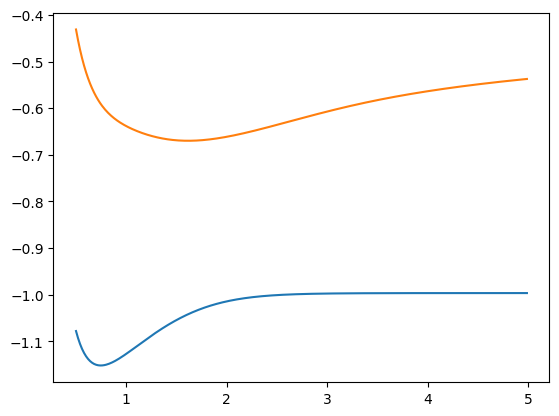

1.3988657844990549
0.7500000000000002
0.15522183458257266


In [10]:
import matplotlib.pyplot as plt
plt.plot(nuc_pos, e_tot)#-e_nuc[:,np.newaxis])
#plt.plot(nuc_pos, e_nuc)
#plt.plot(nuc_pos, e_nuc_grad)
#plt.xlim([0.5,1])
#plt.ylim([-1.2,.75])
plt.show()
print(7.4/5.29)
print(nuc_pos[np.argmin(e_tot[:,0])])
print(e_tot[-1,0] - np.min(e_tot[:,0]))


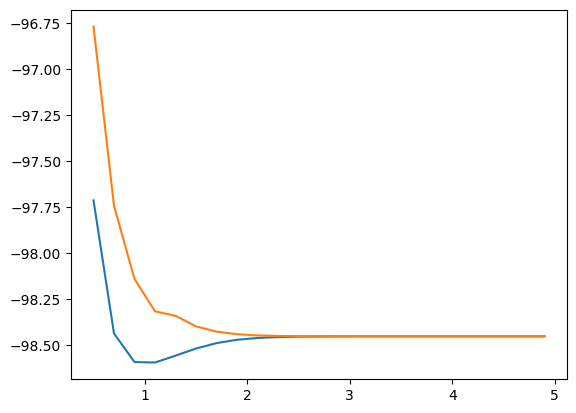

1.3988657844990549
1.0999999999999999


In [26]:
import matplotlib.pyplot as plt
plt.plot(nuc_pos, e_tot)#-e_nuc[:,np.newaxis])
#plt.plot(nuc_pos, e_nuc)
#plt.plot(nuc_pos, e_nuc_grad)
#plt.xlim([0.5,1])
#plt.ylim([-1.2,.75])
plt.show()
print(7.4/5.29)
print(nuc_pos[np.argmin(e_tot[:,0])])

In [ ]:

q_data_nad = data.data_dic['q_coord']
wf_adb_nad = data.data_dic['wf_adb']
t_nad = data.data_dic['t']
diag_eq_nad = data.data_dic['diag_eq']
e_c = data.data_dic['e_c']
e_q = data.data_dic['e_q']
e_c_k = data.data_dic['e_c_k']
e_c_q = data.data_dic['e_c_q']
print(np.shape(e_c_k))
print(np.shape(e_c_q))
e_c_k = np.sum(e_c_k,axis=-1)
plt.plot(t_nad, e_c_k - e_c_k[0])
plt.plot(t_nad, (e_q-e_q[0]))
plt.plot(t_nad, (e_q-e_q[0]) +  e_c_k - e_c_k[0])
#plt.plot(t_nad, e_c_q)
#plt.plot(t_nad, e_c_q+np.sum(e_c_k,axis=-1))
plt.show()
plt.plot(t_nad, e_c-e_c[0])
plt.plot(t_nad, e_q-e_q[0])
plt.show()
q_data_nad=q_data_nad.reshape((len(q_data_nad), model.num_atoms, 3))
plt.plot(t_nad,np.real(q_data_nad[:,:,-1]))
#plt.xlim([0,1])
#plt.ylim([-1,1])
plt.show()

In [ ]:

data_nad = data
q_data_nad = data_nad.data_dic['q_coord']
wf_adb_nad = data_nad.data_dic['wf_adb']
t_nad = data_nad.data_dic['t']
diag_eq_nad = data_nad.data_dic['diag_eq']
e_c = data_nad.data_dic['e_c']
e_q = data_nad.data_dic['e_q']
plt.plot(t_nad, (e_c-e_c[0])*2)
plt.plot(t_nad, e_q-e_q[0])
plt.show()

plt.plot(t_nad, diag_eq_nad)
plt.show()
plt.plot(t_nad,np.abs(np.sum(wf_adb_nad,axis=(1,2)))**2)
plt.plot(t_nad,np.sum(np.abs(wf_adb_nad)**2,axis=(1,2,3)))
#plt.ylim([0,1.2])
plt.show()
q_data_nad=q_data_nad.reshape((len(q_data_nad), model.num_atoms, 3))
plt.plot(t_nad,np.real(q_data_nad[:,:,-1]))
plt.xlim([0,1])
plt.ylim([-1,1])
plt.show()

In [ ]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()


q_data_nad = data_nad.data_dic['q_coord']
wf_adb_nad = data_nad.data_dic['wf_adb']
t_nad = data_nad.data_dic['t']
diag_eq_nad = data_nad.data_dic['diag_eq']
plt.plot(t_nad, diag_eq_nad)
plt.show()
plt.plot(t_nad,np.abs(np.sum(wf_adb_nad,axis=(1,2)))**2)
plt.plot(t_nad,np.sum(np.abs(wf_adb_nad)**2,axis=(1,2,3)))
#plt.ylim([0,1.2])
plt.show()
q_data_nad=q_data_nad.reshape((len(q_data_nad), model.num_atoms, 3))
plt.plot(t,np.real(q_data_nad[:,:,-1]))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

In [ ]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

In [ ]:
import pyscf
from pyscf import gto, scf, cc, ao2mo

# Define the molecule
mol = gto.Mole()
mol.build(
    atom = 'H 0 0 0; F 0 0 1.1',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
)

# Create two different mean-field objects (e.g., different geometries)
mf1 = scf.RHF(mol).run()
mf2 = scf.RHF(mol).run()
mf2.kernel(mf1.make_rdm1())  # Slightly perturb the second geometry

# Calculate the overlap matrix between the two sets of molecular orbitals
s12 = mf1.mo_coeff.T @ mol.intor('int1e_ovlp') @ mf2.mo_coeff

# Create CCSD solvers for both mean-field objects
ccsolver1 = cc.CCSD(mf1).run()
ccsolver2 = cc.CCSD(mf2).run()

# Extract the CCSD amplitudes
t1_1 = ccsolver1.t1
t2_1 = ccsolver1.t2
t1_2 = ccsolver2.t1
t2_2 = ccsolver2.t2

# Calculate the overlap between the two CCSD wavefunctions
rdm1_1 = ccsolver1.make_rdm1()
rdm1_2 = ccsolver2.make_rdm1()
print(s12)
overlap = np.trace(rdm1_1)# @ s12 @ rdm1_2 @ s12.T)

print('<CCSD1|CCSD2> = ', overlap)

In [ ]:
import numpy
from pyscf import fci

numpy.random.seed(1)
norb = 7
nelec = (4,4)
h1 = numpy.random.random((norb,norb))
h2 = numpy.random.random((norb,norb,norb,norb))
# Restore permutation symmetry
h1 = h1 + h1.T
h2 = h2 + h2.transpose(1,0,2,3)
h2 = h2 + h2.transpose(0,1,3,2)
h2 = h2 + h2.transpose(2,3,0,1)

# pspace function computes the FCI Hamiltonian for "primary" determinants.
# Primary determinants are the determinants which have lowest expectation
# value <H>.  np controls the number of primary determinants.
# To get the entire Hamiltonian, np should be larger than the wave-function
# size.  In this example, a (8e,7o) FCI problem has 1225 determinants.
H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=1225)[1]
e_all, v_all = numpy.linalg.eigh(H_fci)

e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=2,
                                    max_space=30, max_cycle=100)

print(np.shape(fcivec[0].ravel()))

In [ ]:

import pyscf
myhf1 = pyscf.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).RHF().run()
myci = pyscf.fci.FCI(myhf1)
myci.run(nroots = 3)
print(np.shape(myci.ci))

In [ ]:
from functools import reduce
import numpy
import pyscf

myhf1 = pyscf.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).RHF().run()
e1, ci1 = pyscf.fci.FCI(myhf1).kernel()
print('FCI energy of mol1', e1)

myhf2 = pyscf.M(atom='H 0 0 0; F 0 0 1.2', basis='6-31g', verbose=0).RHF().run()
e2, ci2 = pyscf.fci.FCI(myhf2).kernel()
print('FCI energy of mol2', e2)
print(np.shape(ci2))

myhf3 = pyscf.M(atom='H 0 0 0; F 0 0 1.3', basis='6-31g', verbose=0).UHF().run()
e3, ci3 = pyscf.fci.FCI(myhf3).kernel()
print('FCI energy of mol3', e3)

norb = myhf2.mo_energy.size
nelec = myhf2.mol.nelectron
eris = pyscf.ao2mo.full(myhf2.mol, myhf2.mo_coeff)
print(numpy.shape(eris))
h1 = myhf2.mo_coeff.T @ myhf2.get_hcore() @ myhf2.mo_coeff
H_fci = pyscf.fci.direct_spin1.pspace(h1, eris, norb, nelec, np=25)[1]
print(numpy.shape(H_fci))
#
# Overlap between FCI wfn of different geometries
#
s12 = pyscf.gto.intor_cross('int1e_ovlp', myhf1.mol, myhf2.mol)
s12 = reduce(numpy.dot, (myhf1.mo_coeff.T, s12, myhf2.mo_coeff))
norb = myhf2.mo_energy.size
nelec = myhf2.mol.nelectron
print('<FCI-mol1|FCI-mol2> = ', pyscf.fci.addons.overlap(ci1, ci2, norb, nelec, s12))

#
# Overlap between RHF-FCI and UHF-FCI
#
s13 = pyscf.gto.intor_cross('int1e_ovlp', myhf1.mol, myhf2.mol)
s13a = reduce(numpy.dot, (myhf1.mo_coeff.T, s13, myhf3.mo_coeff[0]))
s13b = reduce(numpy.dot, (myhf1.mo_coeff.T, s13, myhf3.mo_coeff[1]))
s13 = (s13a, s13b)
norb = myhf3.mo_energy[0].size
nelec = myhf3.mol.nelectron
print('<FCI-mol1|FCI-mol3> = ', pyscf.fci.addons.overlap(ci1, ci3, norb, nelec, s13))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.real(H_fci))
plt.show()
print(np.sum(np.abs(H_fci - np.transpose(H_fci))))

In [ ]:


eris = myci.ao2mo()
h1 = mf1.mo_coeff.T @ mf1.get_hcore() @ mf1.mo_coeff
H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=1225)[1]

# Calculate the FCI wavefunctions
e1, ci1 = cisolver1.kernel()
e2, ci2 = cisolver2.kernel()

# Calculate the overlap between the two FCI wavefunctions
norb = mf1.mo_coeff.shape[1]
nelec = mol.nelectron
overlap = addons.overlap(ci1, ci2, norb, nelec, s12)

print('<FCI1|FCI2> = ', overlap)

In [ ]:
mf1.mol.energy_nuc()

In [ ]:
from pyscf import gto, scf, fci
import pyscf

# Define the molecule
mol = gto.M(
    atom="""
    H 0.0 0.0 0.0
    H 0.0 0.0 0.74 
    """,
    basis='6-31g',
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol).run()
h_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=100000000)[1]


In [ ]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

In [ ]:
import pyscf
print(pyscf.gto.getints(intor_name))

In [ ]:
import pyscf 
from pyscf import gto, scf, ci, grad, nac
import numpy as np
from functools import reduce
# Define the molecule
mol = gto.M(
    atom="""
    H 0.0 0.0 0.0
    H 0.0 0.0 0.74 
    """,
    basis='6-31g',
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol).run()



# Calculate the CI wavefunction for the first two excited states
myci = ci.CISD(mf)
print(myci)
myci.complex_coeff = True
print(myci.complex_coeff)
myci.nroots = 13
myci.run()
print(myci)
ci_coeffs = myci.ci
print(ci_coeffs)

print('grads',myci.Gradients().grad_elec(civec=ci_coeffs[0]))



eris = myci.ao2mo()
#print(eris)

#print(np.dot(ci_coeffs, myci.contract(ci_coeffs, eris)))

#h_1 = mf.get_hcore()
#print(h_1)
#yci.contract(ci_coeffs, eris=eris)


#print(grad.cisd.grad_elec(myci))

#dc = grad.ucisd.Gradients(myci)
#grad1 = dc.kernel(civec=ci_coeffs+0.0j)

#
# RCISD wavefunction overlap
#
myhf1 = gto.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).apply(scf.RHF).run()
ci1 = ci.CISD(myhf1)
ci1.nroots=2
ci1.run()
print('CISD energy of mol1', ci1.e_tot)

myhf2 = gto.M(atom='H 0 0 0; F 0 0 1.2', basis='6-31g', verbose=0).apply(scf.RHF).run()
ci2 = ci.CISD(myhf2).run()
print('CISD energy of mol2', ci2.e_tot)

s12 = gto.intor_cross('cint1e_ovlp_sph', myhf1.mol, myhf2.mol)
s12 = reduce(np.dot, (myhf1.mo_coeff.T, s12, myhf2.mo_coeff))
nmo = myhf2.mo_energy.size
nocc = myhf2.mol.nelectron // 2
print('<CISD-mol1|CISD-mol2> = ', ci.cisd.overlap(ci1.ci[0], ci2.ci, nmo, nocc, s12))

In [ ]:
import matplotlib.pyplot as plt

def generate_CISD_H(myci, civec):
    out_mat = np.zeros((len(civec), len(civec)))
    for n in range(len(civec)):
        #out_mat[:,n] = myci.contract(civec[n], eris=eris)
        for m in range(len(civec)):
            mel = np.dot(civec[m],myci.contract(civec[n], eris=eris))
            out_mat[m, n] = mel

    return out_mat 

H = generate_CISD_H(myci, ci_coeffs)

print(H)
plt.imshow(np.real(H))
plt.show()
print(np.sum(np.abs(H - np.conjugate(np.transpose(H)))))

In [ ]:
print(np.shape(ci_coeffs))
print(np.shape(mf._eri))

In [ ]:
print(np.sort(np.linalg.eigvals(H)))